In [1]:
from funkcje import gpu

Hyperparametry


In [2]:
from hyperparam import Args     

args = Args()

Dane:

In [3]:
from funkcje import get_nb_files

print ('Train dataset contains {} samples ({} steps / epoch)'.format(args.nb_train_samples, args.train_steps))
print ('Valid dataset contains {} samples ({} steps / epoch)'.format(args.nb_valid_samples, args.valid_steps))
print ('Dataset contains {} classes ({}).'.format(args.nb_classes, args.classes))

Train dataset contains 15707 samples (490 steps / epoch)
Valid dataset contains 5236 samples (163 steps / epoch)
Dataset contains 10 classes (['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']).


In [4]:
args.classes

['butterfly',
 'cat',
 'chicken',
 'cow',
 'dog',
 'elephant',
 'horse',
 'sheep',
 'spider',
 'squirrel']

Generatory/Preprocessing

In [5]:
from dataaug import train, valid

train_generator = train()
validation_generator = valid()

Found 15707 images belonging to 10 classes.
Found 5236 images belonging to 10 classes.


Testowe wyswietlenie obrazkow po preprocessingu
:

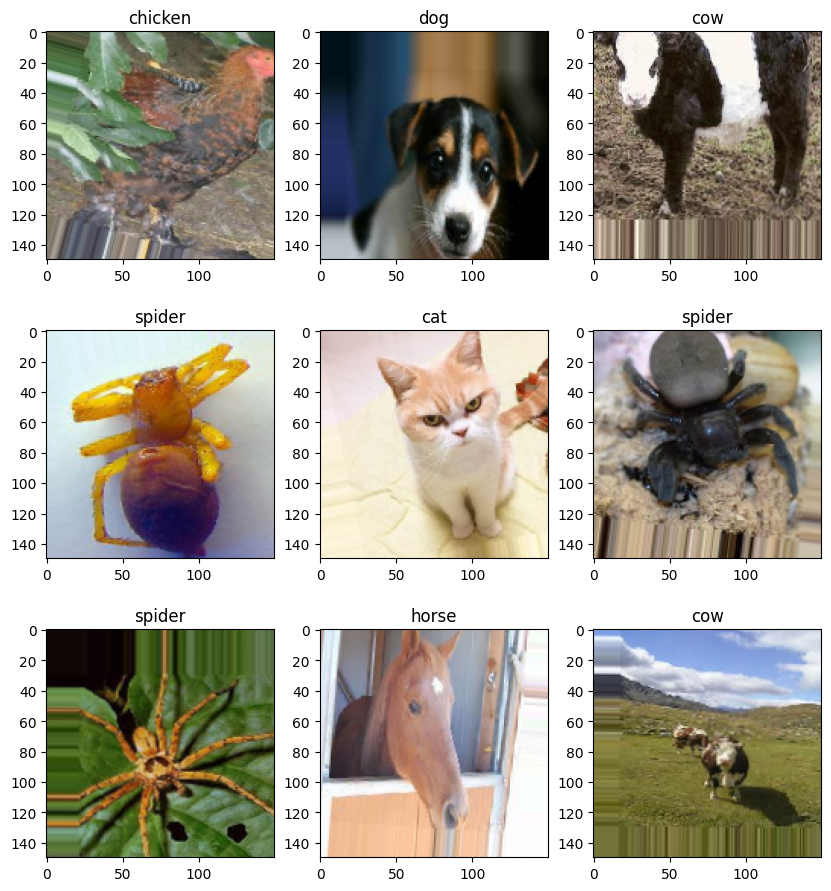

In [6]:
from funkcje import wyswPrzyklad

wyswPrzyklad(train_generator, args.classes)

Tworzenie modelu:

In [7]:
from model import utworzModel
model = utworzModel()

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 separable_conv2d (Separable  (None, 150, 150, 32)     1344      
 Conv2D)                                                         
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                        

Trenowanie modelu:

In [10]:
history = model.fit(
    train_generator,
    epochs = 50,
    validation_data=validation_generator,
)

Epoch 1/50
491/491 [==============================] - 119s 227ms/step - loss: 2.1121 - accuracy: 0.2661 - val_loss: 2.0360 - val_accuracy: 0.3054
Epoch 2/50
491/491 [==============================] - 95s 194ms/step - loss: 1.7880 - accuracy: 0.3855 - val_loss: 1.8527 - val_accuracy: 0.3978
Epoch 3/50
491/491 [==============================] - 95s 193ms/step - loss: 1.5358 - accuracy: 0.4789 - val_loss: 1.6034 - val_accuracy: 0.4605
Epoch 4/50
491/491 [==============================] - 95s 194ms/step - loss: 1.3879 - accuracy: 0.5297 - val_loss: 1.4688 - val_accuracy: 0.5013
Epoch 5/50
491/491 [==============================] - 95s 194ms/step - loss: 1.2769 - accuracy: 0.5634 - val_loss: 1.4282 - val_accuracy: 0.5294
Epoch 6/50
491/491 [==============================] - 95s 193ms/step - loss: 1.1907 - accuracy: 0.5981 - val_loss: 1.4033 - val_accuracy: 0.5374
Epoch 7/50
491/491 [==============================] - 95s 194ms/step - loss: 1.1234 - accuracy: 0.6275 - val_loss: 1.2986 - val_a

Wykresy testu accuracy i loss:

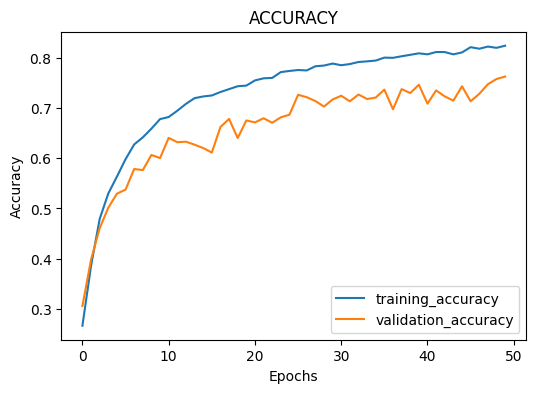

In [11]:
from funkcje import wyswWykres

wyswWykres(history, 'acc')

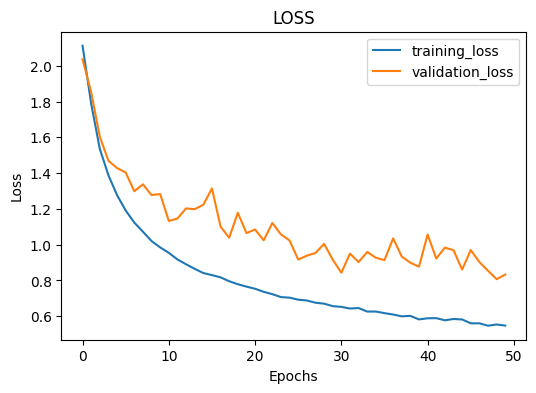

In [12]:
wyswWykres(history, 'loss')

Test modelu na przykladach z zbioru testowego:

1/1 [==============================] - 0s 350ms/step


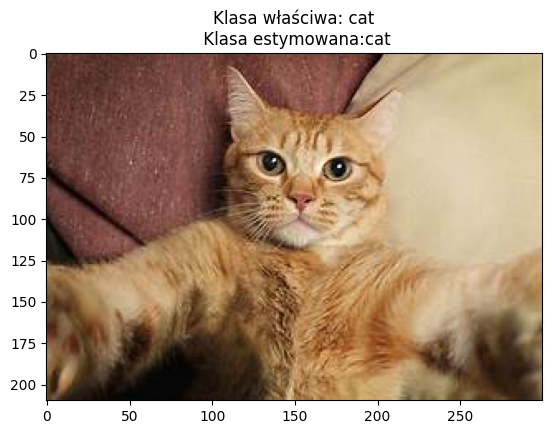

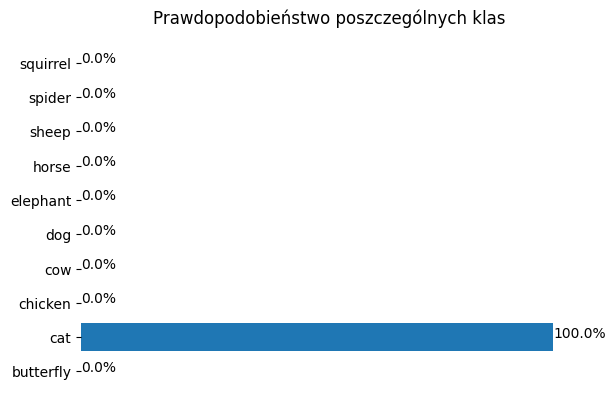

In [14]:
from funkcje import sprawdzKlase

IMAGE_PATH='C:/Users/yamrc/animals/test/cat/1.jpeg'

sprawdzKlase(IMAGE_PATH, model, args.classes)

1/1 [==============================] - 0s 18ms/step


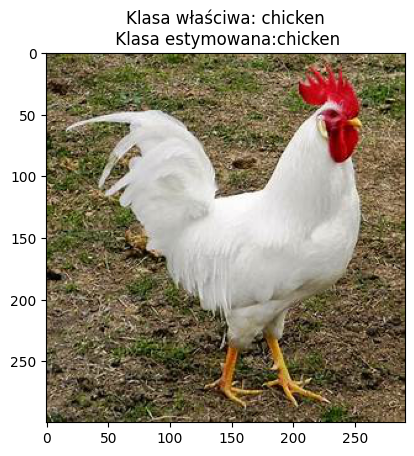

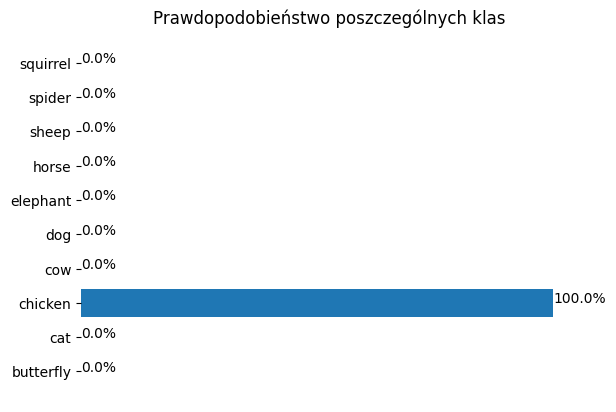

In [15]:
IMAGE_PATH='C:/Users/yamrc/animals/test/chicken/10.jpeg'

sprawdzKlase(IMAGE_PATH, model, args.classes)

1/1 [==============================] - 0s 17ms/step


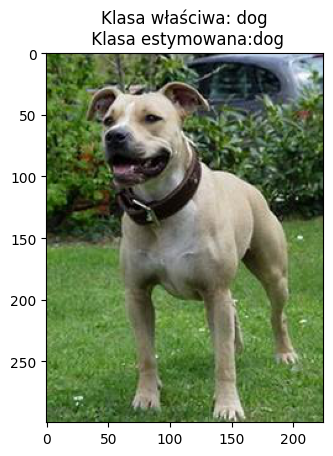

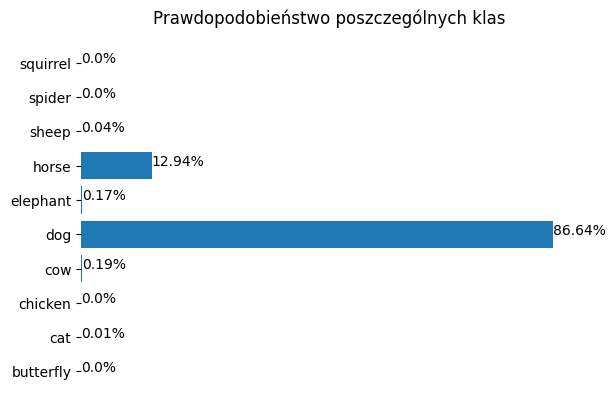

In [17]:
IMAGE_PATH='C:/Users/yamrc/animals/test/dog/OIP-ZrIsvFlFHBxLA_Ng9l-0DQHaJ4.jpeg'

sprawdzKlase(IMAGE_PATH, model, args.classes)

Zapisanie modelu:

In [18]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
